In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (accuracy_score , confusion_matrix, roc_curve ,roc_auc_score,
precision_score,recall_score , f1_score,classification_report)

from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
data = pd.read_csv(r'telecom_churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data.drop('customerID' , axis = 1 , inplace = True)

In [7]:
pd.set_option('max_columns' , None)

In [8]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
def set(x):
    try:
        return float(x)
    except:
        return 0

In [11]:
data['TotalCharges'] = data['TotalCharges'].apply(set)

In [12]:
data.select_dtypes('object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [13]:
cols = data.select_dtypes('object').columns

In [14]:
dic = dict()

for i in cols:
    dic[i] = dict(data[i].value_counts())

In [15]:
dic

{'gender': {'Male': 3555, 'Female': 3488},
 'Partner': {'No': 3641, 'Yes': 3402},
 'Dependents': {'No': 4933, 'Yes': 2110},
 'PhoneService': {'Yes': 6361, 'No': 682},
 'MultipleLines': {'No': 3390, 'Yes': 2971, 'No phone service': 682},
 'InternetService': {'Fiber optic': 3096, 'DSL': 2421, 'No': 1526},
 'OnlineSecurity': {'No': 3498, 'Yes': 2019, 'No internet service': 1526},
 'OnlineBackup': {'No': 3088, 'Yes': 2429, 'No internet service': 1526},
 'DeviceProtection': {'No': 3095, 'Yes': 2422, 'No internet service': 1526},
 'TechSupport': {'No': 3473, 'Yes': 2044, 'No internet service': 1526},
 'StreamingTV': {'No': 2810, 'Yes': 2707, 'No internet service': 1526},
 'StreamingMovies': {'No': 2785, 'Yes': 2732, 'No internet service': 1526},
 'Contract': {'Month-to-month': 3875, 'Two year': 1695, 'One year': 1473},
 'PaperlessBilling': {'Yes': 4171, 'No': 2872},
 'PaymentMethod': {'Electronic check': 2365,
  'Mailed check': 1612,
  'Bank transfer (automatic)': 1544,
  'Credit card (autom

In [16]:
one = ['MultipleLines' , 'InternetService' , 'OnlineSecurity' ,'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
      'StreamingMovies','Contract','PaymentMethod']
label = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

In [17]:
for i in label:
    data[i] = data[i].map({'Yes':1 , 'No':0})

In [18]:
data['gender'] = data['gender'].map({'Male':1 , 'Female':0})

In [20]:
data = pd.get_dummies(data , columns = one , drop_first = True)

In [21]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [22]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,0.265370,0.096834,0.421837,0.439585,0.216669,0.216669,0.286668,0.216669,0.344881,0.216669,0.343888,0.216669,0.290217,0.216669,0.384353,0.216669,0.387903,0.209144,0.240664,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,0.441561,0.295752,0.493888,0.496372,0.412004,0.412004,0.452237,0.412004,0.475363,0.412004,0.475038,0.412004,0.453895,0.412004,0.486477,0.412004,0.487307,0.406726,0.427517,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
nums = ['TotalCharges','MonthlyCharges','tenure']

In [24]:
data[nums].describe()

,TotalCharges,MonthlyCharges,tenure
count,7043.000000,7043.000000,7043.000000
mean,2279.734304,64.761692,32.371149
std,2266.794470,30.090047,24.559481
min,0.000000,18.250000,0.000000
25%,398.550000,35.500000,9.000000
50%,1394.550000,70.350000,29.000000
75%,3786.600000,89.850000,55.000000
max,8684.800000,118.750000,72.000000


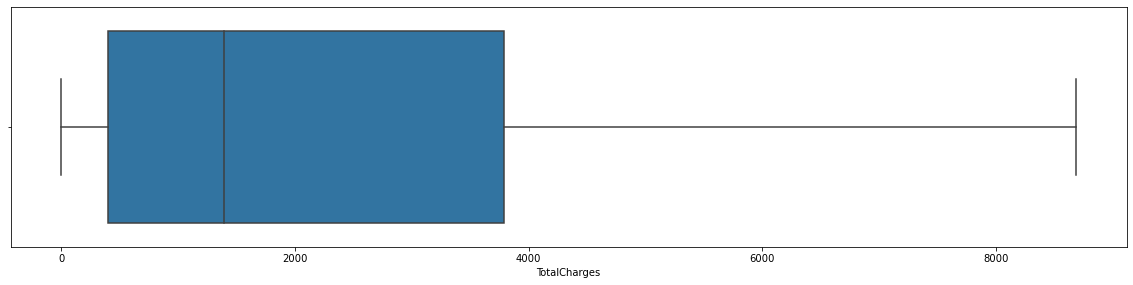

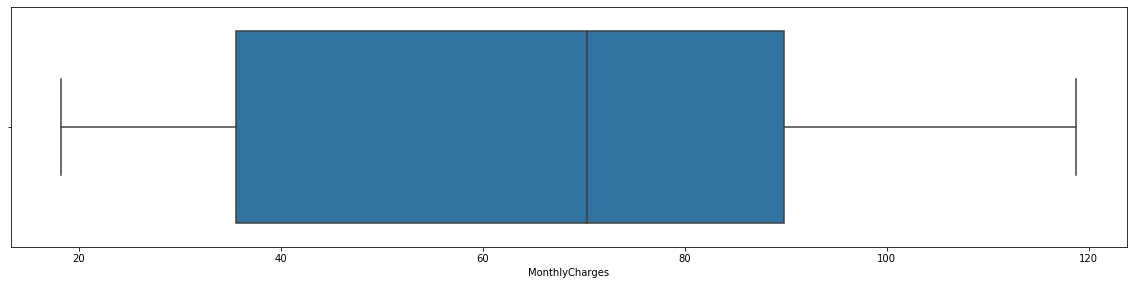

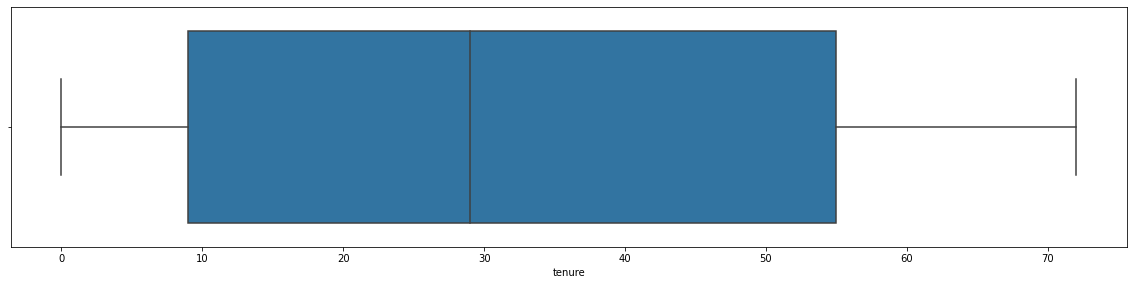

In [25]:
for p , i in zip([1,2,3] , nums):
    plt.figure(figsize = (20,15))
    plt.subplot(3,1,p)
    sns.boxplot(x = data[i])
    plt.show()

In [26]:
sc = StandardScaler()

In [27]:
df = data.copy()

In [28]:
df[nums] = sc.fit_transform(data[nums])

In [29]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.992611,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0.066327,1,0,-0.259629,-0.172165,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.958066,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0.514251,0,0,-0.746535,-0.193672,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,-1.236724,1,1,0.197365,-0.938874,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,1,0.665992,-0.127605,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1
7039,0,0,1,1,1.613701,1,1,1.277533,2.242606,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0
7040,0,0,1,1,-0.870241,0,1,-1.168632,-0.852932,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7041,1,1,1,0,-1.155283,1,1,0.320338,-0.870513,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
X = df.drop('Churn' , axis = 1)
Y = df['Churn']

In [32]:
X_Train , X_Test , Y_Train , Y_Test = train_test_split(X , Y , test_size = 0.2 , random_state = 44)

### Random Forest

In [33]:
RF = RandomForestClassifier()

In [34]:
RF.fit(X_Train , Y_Train)

RandomForestClassifier()

In [35]:
RF.score(X_Test , Y_Test)

0.7835344215755855

In [36]:
print(classification_report(y_true = Y_Test , y_pred = RF.predict(X_Test)))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1027
           1       0.64      0.46      0.53       382

    accuracy                           0.78      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [37]:
accuracy_score(y_true = Y_Test , y_pred = RF.predict(X_Test))

0.7835344215755855

In [38]:
RF.predict_proba(X_Test)[:,0]

array([0.96, 0.89, 0.82, ..., 0.22, 0.57, 0.99])

In [39]:
roc_auc_score(Y_Test ,RF.predict_proba(X_Test)[:,0])

0.1792059421789689

In [40]:
f1_score(y_true = Y_Test , y_pred = RF.predict(X_Test))

0.5343511450381679

In [41]:
precision_score(y_true = Y_Test , y_pred = RF.predict(X_Test))

0.6410256410256411

In [42]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [43]:
confusion_matrix(y_true = Y_Test , y_pred = RF.predict(X_Test))

array([[929,  98],
       [207, 175]], dtype=int64)

### Handling Imbalance

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
sm = SMOTE(random_state = 2)
X_res , Y_res = sm.fit_resample(X , Y)

In [46]:
X_Train , X_Test , Y_Train , Y_Test = train_test_split(X_res , Y_res , test_size = 0.2 , random_state = 44)

In [47]:
RF.fit(X_Train , Y_Train)

RandomForestClassifier()

In [48]:
RF.score(X_Test , Y_Test)

0.8357487922705314

In [49]:
print(classification_report(y_true = Y_Test , y_pred = RF.predict(X_Test)))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1004
           1       0.83      0.86      0.84      1066

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



In [50]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


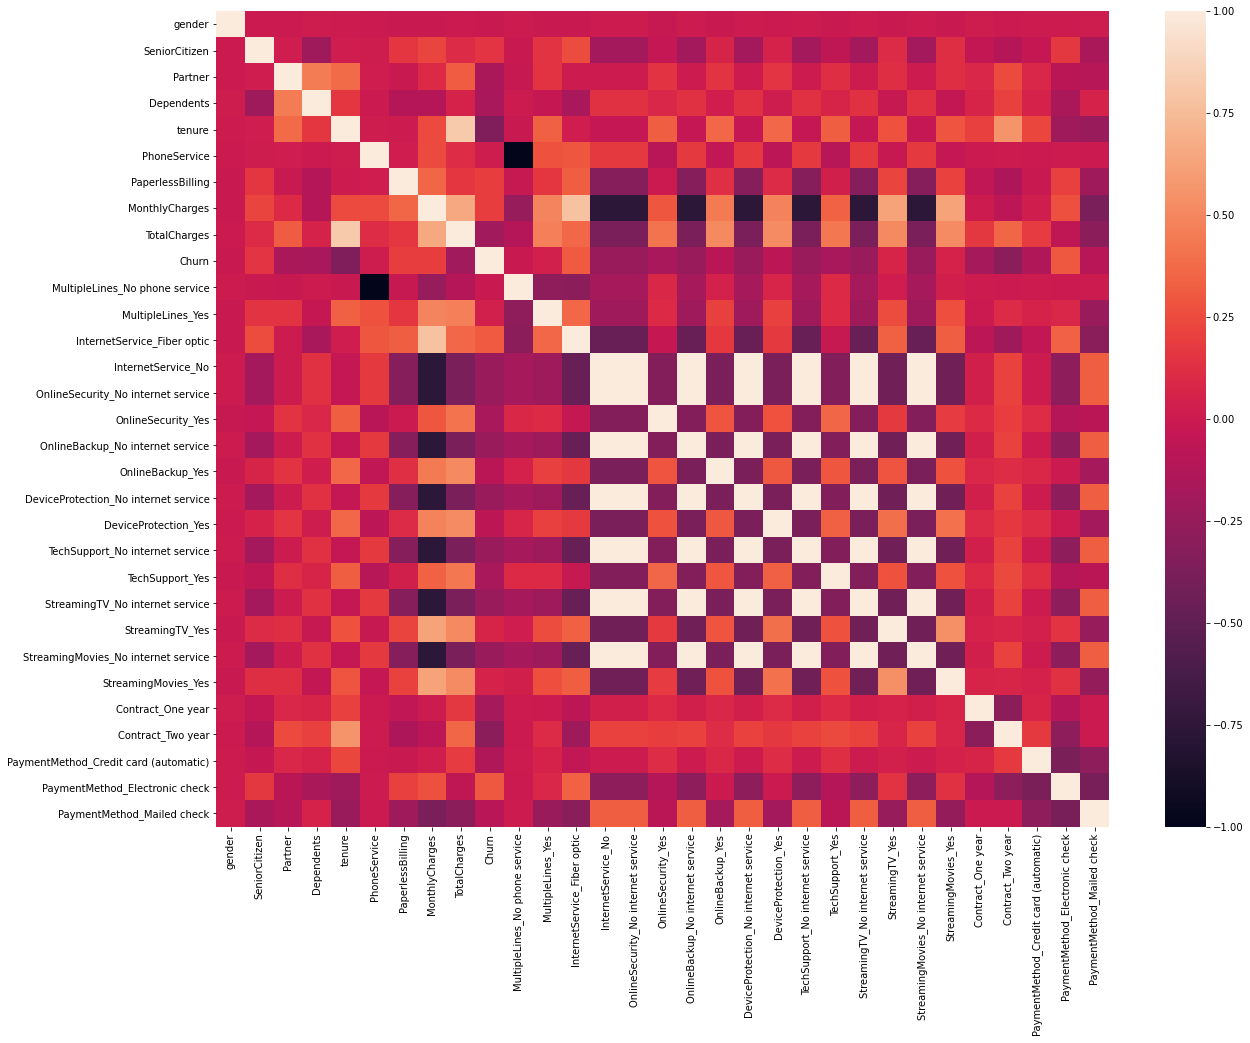

In [51]:
plt.figure(figsize = (20,15))

sns.heatmap(data.corr())

In [52]:
bl = data.columns.str.contains(r'internet' )

In [53]:
l = list()

for i , b in zip(data.columns , bl):
    if (b):
        l.append(i)
    else:
        pass

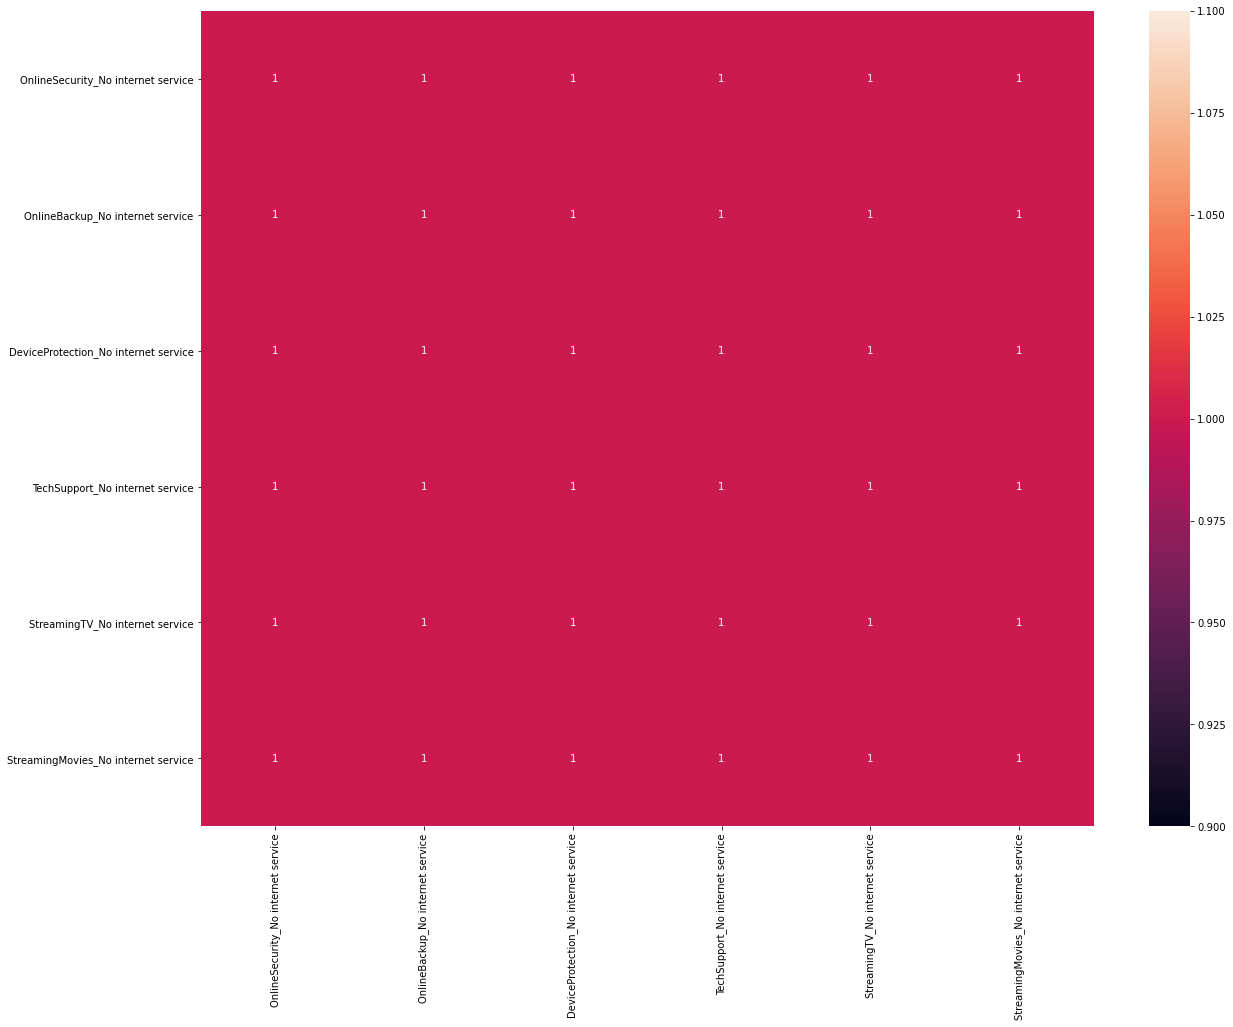

In [55]:
plt.figure(figsize = (20,15))

sns.heatmap(data[l].corr() , annot = True)

In [61]:
df.drop(l , axis = 1 , inplace = True)

In [63]:
X = df.drop('Churn' , axis = 1)
Y = df['Churn']

sm = SMOTE(random_state = 2)
X_res , Y_res = sm.fit_resample(X , Y)

X_Train , X_Test , Y_Train , Y_Test = train_test_split(X_res , Y_res , test_size = 0.2 , random_state = 44)

RF.fit(X_Train , Y_Train)

RandomForestClassifier()

In [64]:
RF.score(X_Test , Y_Test)

0.8338164251207729

In [65]:
print(classification_report(y_true = Y_Test , y_pred = RF.predict(X_Test)))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1004
           1       0.83      0.85      0.84      1066

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



### Logistic  Regression

In [66]:
lr = LogisticRegression()

In [67]:
X = df.drop('Churn' , axis = 1)
Y = df['Churn']

sm = SMOTE(random_state = 2)
X_res , Y_res = sm.fit_resample(X , Y)

X_Train , X_Test , Y_Train , Y_Test = train_test_split(X_res , Y_res , test_size = 0.2 , random_state = 44)

lr.fit(X_Train , Y_Train)

LogisticRegression()

In [68]:
lr.score(X_Test , Y_Test)

0.7908212560386474

In [69]:
print(classification_report(y_true = Y_Test , y_pred = lr.predict(X_Test)))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78      1004
           1       0.78      0.82      0.80      1066

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



### SVC

In [70]:
from sklearn.svm import SVC

In [71]:
svc = SVC()

In [72]:
X = df.drop('Churn' , axis = 1)
Y = df['Churn']

sm = SMOTE(random_state = 2)
X_res , Y_res = sm.fit_resample(X , Y)

X_Train , X_Test , Y_Train , Y_Test = train_test_split(X_res , Y_res , test_size = 0.2 , random_state = 44)

svc.fit(X_Train , Y_Train)

SVC()

In [73]:
svc.score(X_Test , Y_Test)

0.8057971014492754

### XGBoost

In [74]:
from xgboost import XGBClassifier

In [77]:
xgb = XGBClassifier(use_label_encoder = False)

In [78]:
X = df.drop('Churn' , axis = 1)
Y = df['Churn']

sm = SMOTE(random_state = 2)
X_res , Y_res = sm.fit_resample(X , Y)

X_Train , X_Test , Y_Train , Y_Test = train_test_split(X_res , Y_res , test_size = 0.2 , random_state = 44)

xgb.fit(X_Train , Y_Train)

[23:46:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [79]:
xgb.score(X_Test , Y_Test)

d:\anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.836231884057971